<a href="https://colab.research.google.com/github/Eisring/BC_project_1/blob/main/Project_2_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/

/content/drive/My Drive


In [ ]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm import tqdm_notebook

%matplotlib inline


In [ ]:
test_size = 0.2                 
val_size = 0.2                   
Nmax = 30                       
                                
fontsize = 14
ticklabelsize = 14

In [ ]:
def get_preds_lin_reg(df, target_col, N, pred_min, offset):
  
    regr = LinearRegression(fit_intercept=True)

    pred_list = []

    for i in range(offset, len(df['adj_close'])):
        X_train = np.array(range(len(df['adj_close'][i-N:i])))
        y_train = np.array(df['adj_close'][i-N:i])
        X_train = X_train.reshape(-1, 1)    

      
        y_train = y_train.reshape(-1, 1)
    
        regr.fit(X_train, y_train)           
        pred = regr.predict(np.array(N).reshape(1,-1))
    
        pred_list.append(pred[0][0])  
    
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
        
    return pred_list

def get_mape(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
df = pd.read_csv('SSE.csv')

df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]


df['month'] = df['date'].dt.month

df.sort_values(by='date', inplace=True, ascending=True)

df

,date,open,high,low,close,adj_close,volume,month
0,2016-11-11,31700.0,32360.0,31700.0,31960.0,27434.169922,12836800.0,11
1,2016-11-14,31900.0,31920.0,31040.0,31060.0,26661.613281,15133300.0,11
2,2016-11-15,31060.0,31620.0,30780.0,30780.0,26421.265625,13665700.0,11
3,2016-11-16,30800.0,31280.0,30800.0,31160.0,26747.449219,13308200.0,11
4,2016-11-17,31100.0,31520.0,30900.0,31360.0,26919.126953,7870550.0,11
...,...,...,...,...,...,...,...,...
1221,2021-11-04,71200.0,71600.0,70500.0,70600.0,70600.000000,11818987.0,11
1222,2021-11-05,71600.0,71600.0,70200.0,70200.0,70200.000000,12667743.0,11
1223,2021-11-08,70400.0,70600.0,69800.0,70600.0,70600.000000,11121981.0,11
1224,2021-11-09,70300.0,71000.0,70100.0,70500.0,70500.000000,11159589.0,11


Text(0, 0.5, 'KRW')

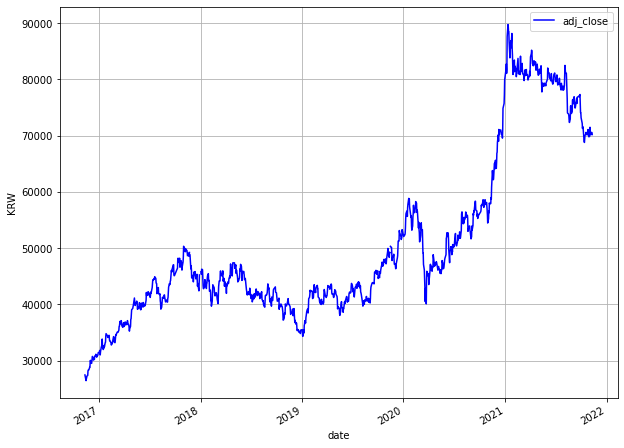

In [ ]:
rcParams['figure.figsize'] = 10, 8 

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("KRW")

In [ ]:

num_val = int(val_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_val - num_test



train = df[:num_train].copy()
val = df[num_train:num_train+num_val].copy()
train_val = df[:num_train+num_val].copy()
test = df[num_train+num_val:].copy()

In [ ]:
train_val = train_val.dropna()
train = train.dropna()
test = test.dropna()
val = val.dropna()

In [ ]:
num_train = len(train)
num_val = len(val)
num_test = len(test)

Text(0, 0.5, 'KRW')

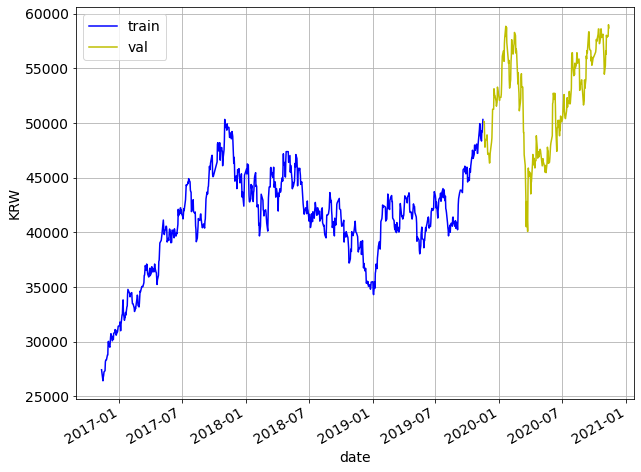

In [ ]:
rcParams['figure.figsize'] = 10, 8 
ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = val.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
#ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'val', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("KRW")

In [ ]:
RMSE = []
R2 = []
mape = []
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_lin_reg(train_val, 'adj_close', N, 0, num_train)
    
    val.loc[:, 'est' + '_N' + str(N)] = est_list[:]
    RMSE.append(math.sqrt(mean_squared_error(est_list, val['adj_close'])))
    R2.append(r2_score(val['adj_close'], est_list))
    mape.append(get_mape(val['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('R2 = ' + str(R2))
print('MAPE = ' + str(mape))
val.shape


RMSE = [1005.4625799263638, 1417.199003358424, 1183.5411159428386, 1189.5318142578933, 1250.5064900578259, 1325.8783404619098, 1392.1306097962693, 1447.2606047158458, 1507.8191055444174, 1557.5655727127394, 1618.680213518439, 1682.8233829806732, 1741.4692105348931, 1799.1354360244318, 1851.3640296333422, 1893.1557366372526, 1924.124648751049, 1946.0884951649402, 1965.1494971897284, 1981.7081363075488, 1994.6384252092382, 2005.6522933717654, 2015.0344315017257, 2022.824764722993, 2030.6449133213198, 2042.469921182594, 2062.2047937832604, 2088.440070324875, 2119.1427176720267, 2151.627515050409]
R2 = [0.9459436753619591, 0.8926069031311126, 0.9251000738750937, 0.9243399170055229, 0.9163845387555722, 0.9060012579173485, 0.8963725872875951, 0.8880025406783416, 0.8784337070184215, 0.8702798720714999, 0.859900428905523, 0.8485770280980969, 0.8378390460090205, 0.8269217860804083, 0.816727065890022, 0.808359465574069, 0.8020383358949579, 0.7974930838443353, 0.7935067408833458, 0.79001219463755

(245, 38)

Text(0.5, 1.0, 'RMSE')

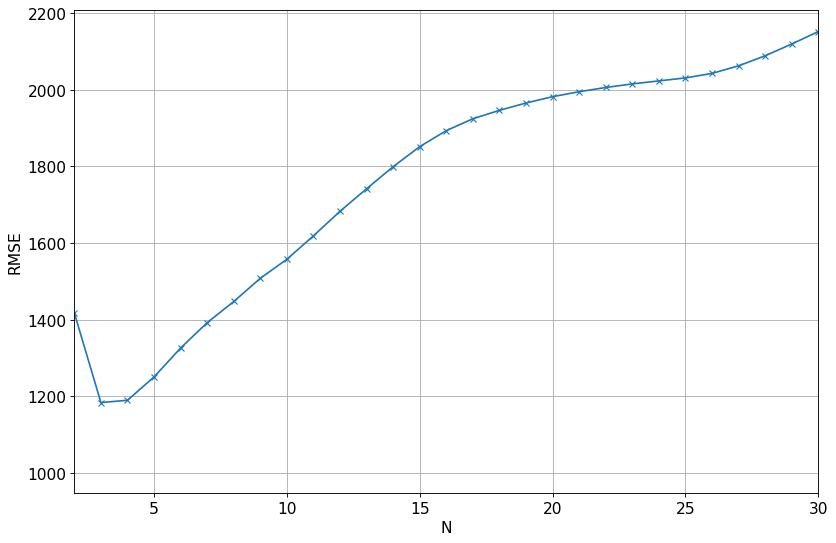

In [ ]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 30])
ax.set_title('RMSE')

Text(0.5, 1.0, 'R2')

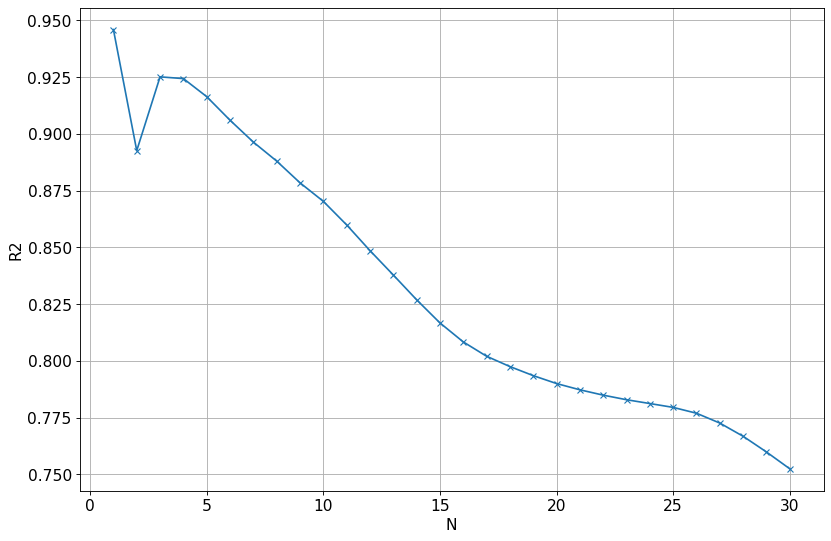

In [ ]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), R2, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('R2')
ax.set_title('R2')

In [ ]:
N_opt = 5

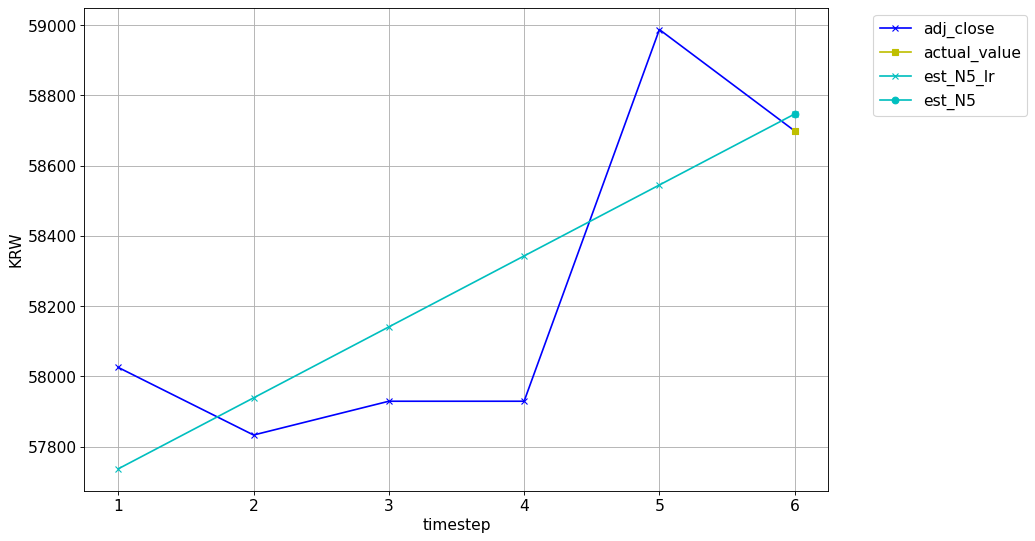

In [ ]:
day = pd.Timestamp(date(2020, 11, 30))

Nmax2 = 5

df_temp = val[val['date'] <= day]
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1,Nmax2+2), df_temp[-Nmax2-1:]['adj_close'], 'bx-')
plt.plot(Nmax2+1, df_temp[-1:]['adj_close'], 'ys-')
legend_list = ['adj_close', 'actual_value']

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
marker_list = ['x', 'x', 'x', 'x', 'x', 'x', 'x']
regr = LinearRegression(fit_intercept=True)
for N in range(5, Nmax2+1):
    
    X_train = np.array(range(len(df_temp['adj_close'][-N-1:-1]))) 
    y_train = np.array(df_temp['adj_close'][-N-1:-1])
    X_train = X_train.reshape(-1, 1)     
    y_train = y_train.reshape(-1, 1)
    regr.fit(X_train, y_train)            
    y_est = regr.predict(X_train)        
    plt.plot(range(Nmax2+1-N,Nmax2+2), 
             np.concatenate((y_est, np.array(df_temp['est_N'+str(N)][-1:]).reshape(-1,1))),
             color=color_list[N%len(color_list)], 
             marker=marker_list[N%len(marker_list)])
    legend_list.append('est_N'+str(N)+'_lr')
    
    plt.plot(Nmax2+1, 
             df_temp['est_N'+str(N)][-1:], 
             color=color_list[N%len(color_list)], 
             marker='o')
    legend_list.append('est_N'+str(N))
    

plt.grid()
plt.xlabel('timestep')
plt.ylabel('KRW')
plt.legend(legend_list, bbox_to_anchor=(1.05, 1))
matplotlib.rcParams.update({'font.size': fontsize})

Text(0, 0.5, 'KRW')

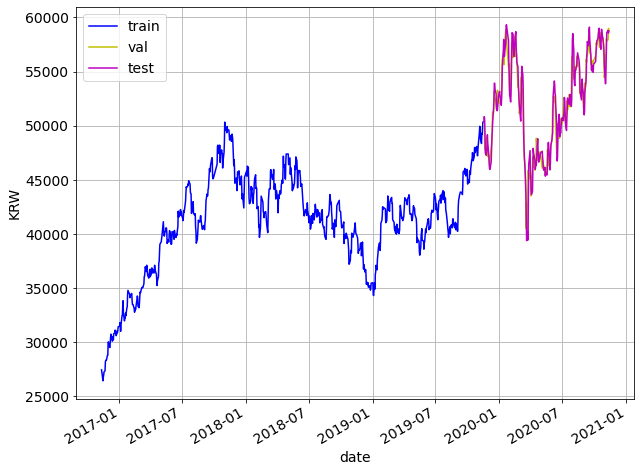

In [ ]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = val.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
#ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)

ax = val.plot(x='date', y='est_N5', style='m-', grid=True, ax=ax)
ax.legend(['train', 'val', 'test', 'predictions with N=1', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("KRW")

Text(0.5, 1.0, 'val set')

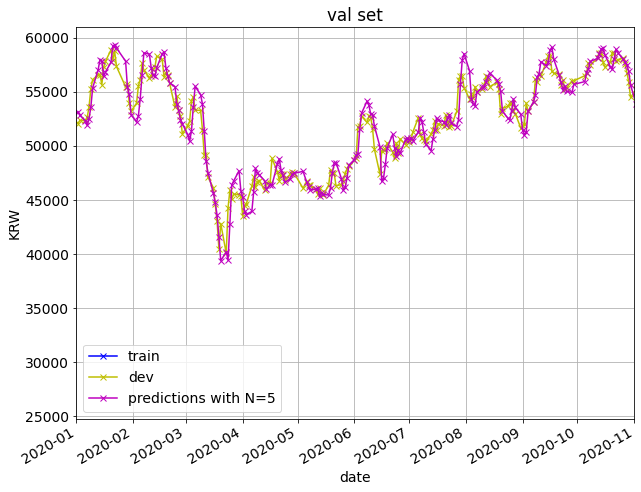

In [ ]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = val.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
#ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = val.plot(x='date', y='est_N5', style='mx-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'predictions with N=5'])
ax.set_xlabel("date")
ax.set_ylabel("KRW")
ax.set_xlim([date(2020, 1, 1), date(2020, 11, 1)])
ax.set_title('val set')